In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import numpy as np
import feature_manager as fma 
from sklearn import svm
from sklearn.model_selection import train_test_split
import tr_printer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
symbol = "BTCUSDT"
trade_tf = "4h"
macro_tf = "1d"
super_tf = "1w"
granular_tf = "1m"

fm = fma.FeatureManager(target_col="trade_signal")

fm.import_trading_data(symbol=symbol,trade_timeframe=trade_tf)
fm.import_macro_data(symbol=symbol,macro_timeframe=macro_tf)
fm.import_super_data(symbol=symbol,super_timeframe=super_tf)
fm.import_granular_data(symbol=symbol,granular_timeframe=granular_tf)

Imported trading data from ../data/BTCUSDT-4h.csv with 11760 rows
Imported macro data from ../data/BTCUSDT-1d.csv with 1963 rows
Imported super macro data from ../data/BTCUSDT-1w.csv with 247 rows
Imported granular data from ../nocommit/BTCUSDT-1m.csv with 2817999 rows


In [3]:
tp = 0.042
sl = 0.042
md = 14

fm.prepare_trade_forward_data(
    take_profit_rate=tp,
    stop_loss_rate=sl,
    max_duration=md,
)

Scanning 14 future timeframes to build trade signal: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Label producing completed. 
 Value counts:
0    3849
1    3973
2    3938
Name: trade_signal, dtype: int64


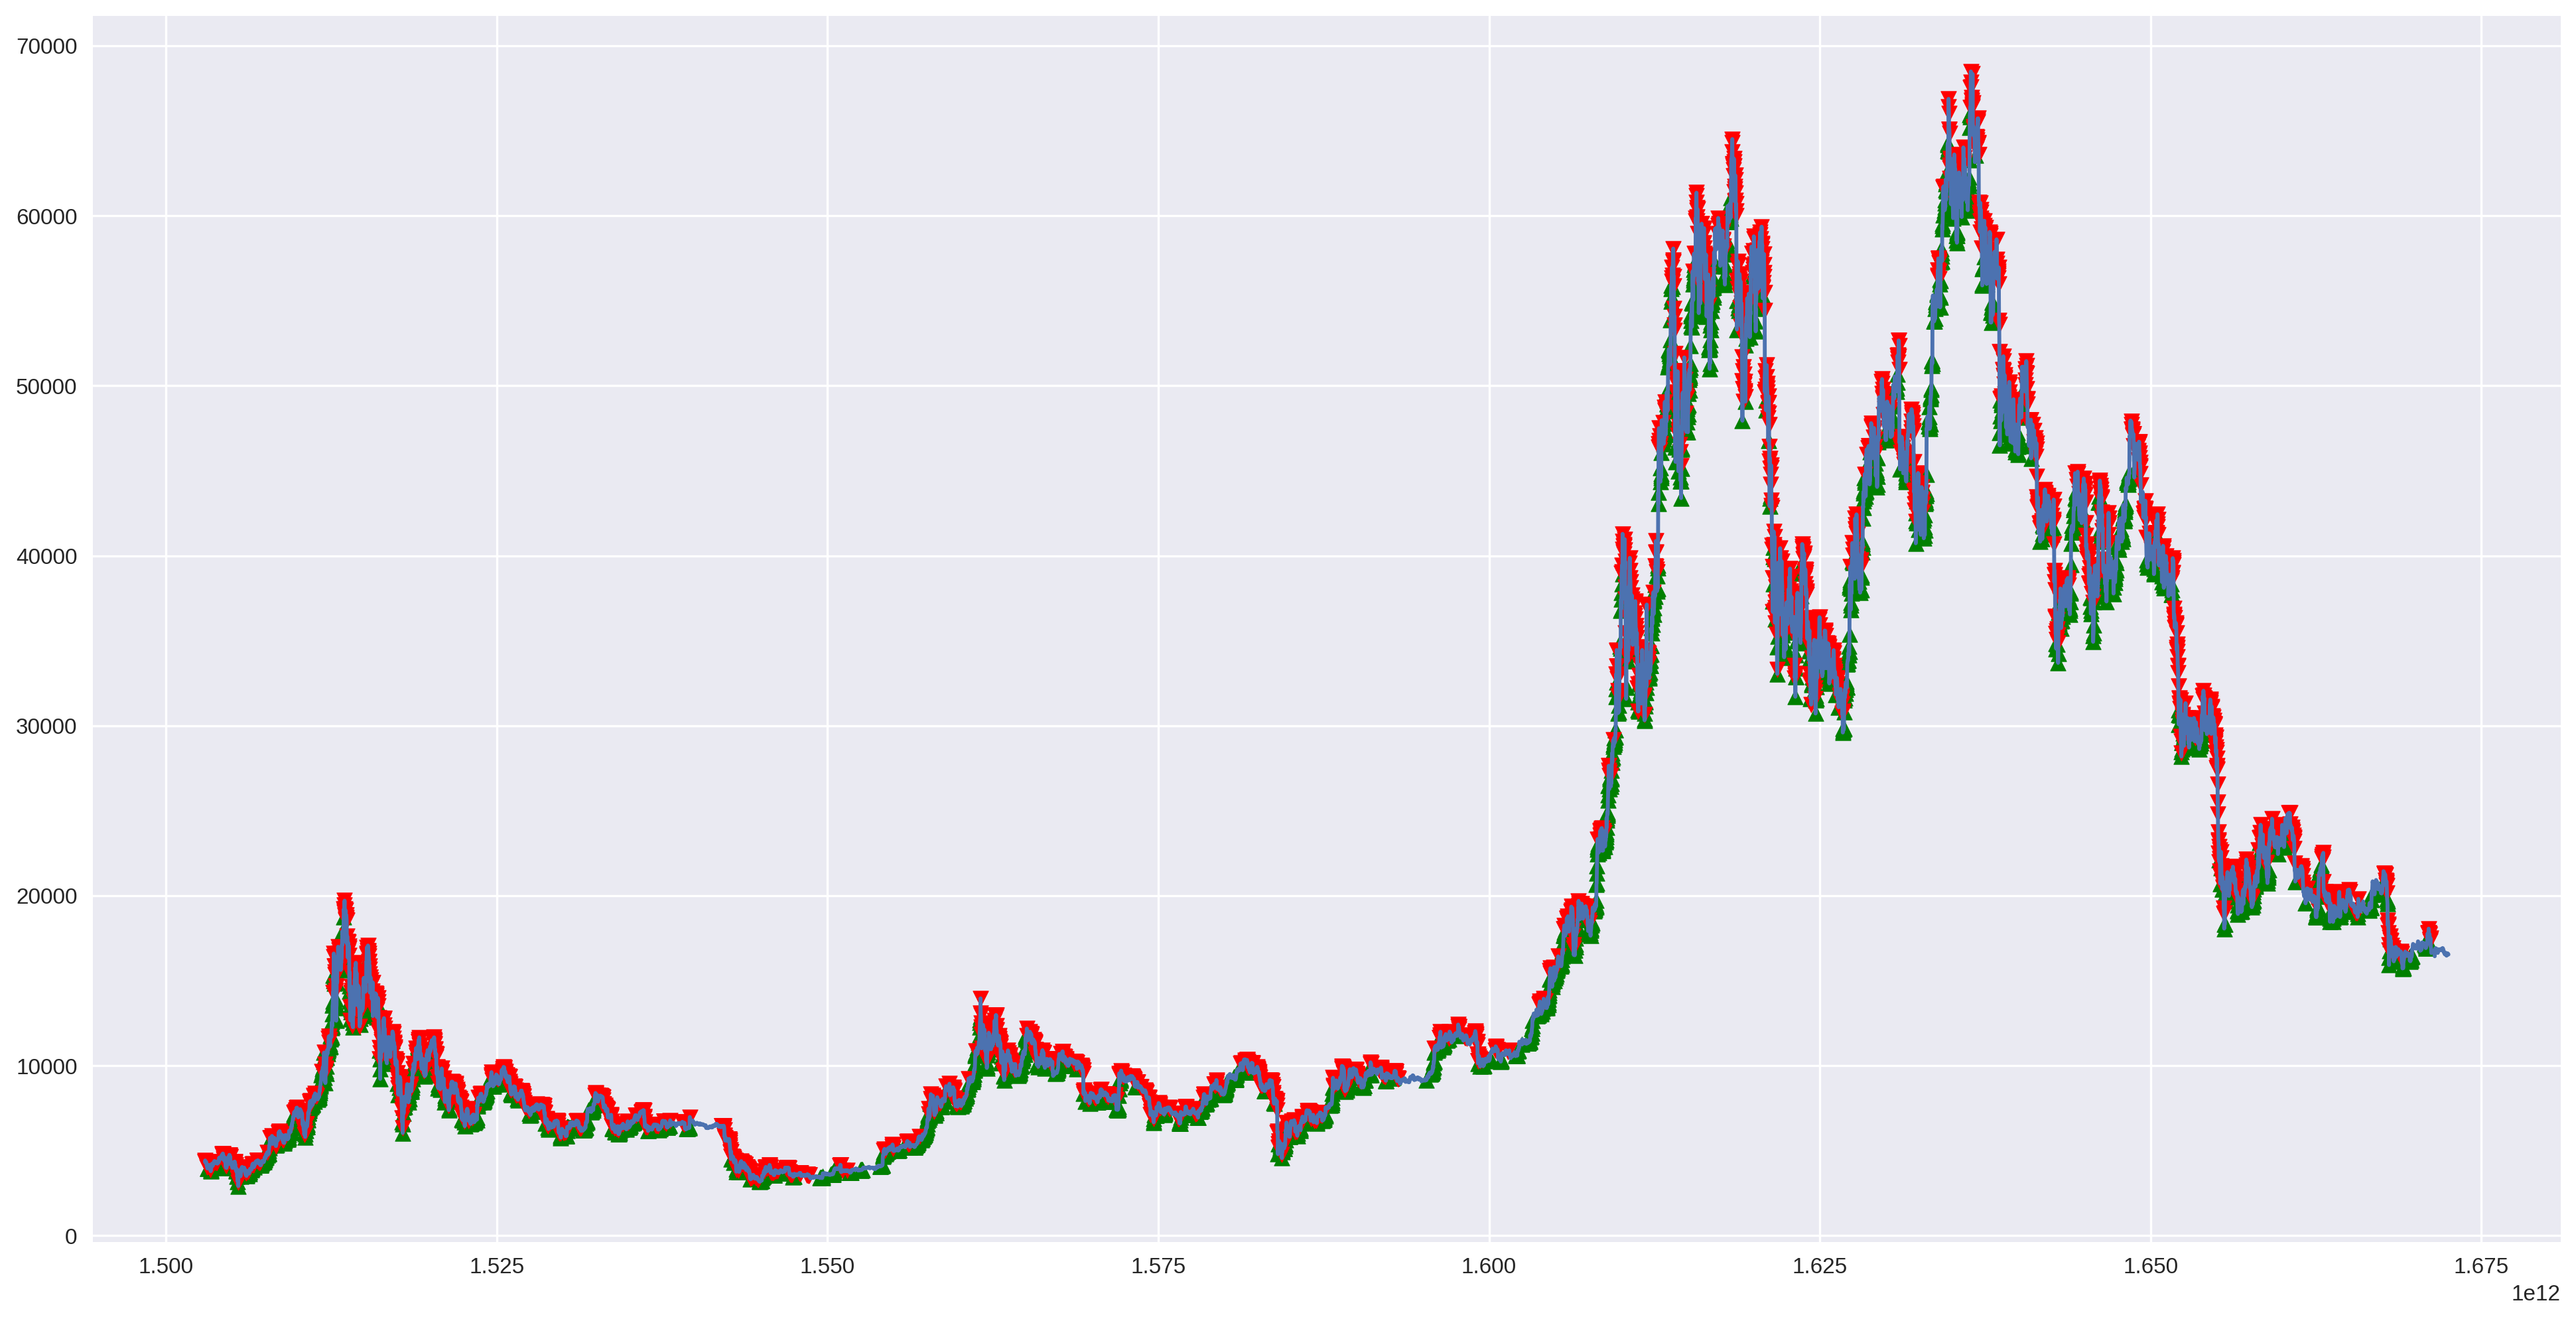

In [4]:
fm.plot_trade_signal(dpi=240)

In [ ]:
len(fm.df)

In [5]:
features = [
    # "returns",
    # "dir",
    # "hashrate",
    # "fed_rate",
    # "gold",
    # "nasdaq",
    # "sp500",
    # "google_trend",      
    "sma_3_10",
    "sma_7_30",
    "sma_14_50",
    "sma_28_90",         
    # # "boll",     
    # "boll7",
    # "boll14",
    # "boll21",
    # "min",      
    # "min7",      
    # "min14",
    # "min21",
    # "max",      
    # "max7",      
    # "max14",
    # "max21",
    # "mom",
    # "mom7",      
    # "mom14",
    # "mom21",
    # "vol",      
    # "vol7",      
    # "vol14",
    # "vol21",
    # "obv",      
    # "mfi7",     
    # "mfi14",
    # "mfi21",
    "rsi7",      
    "rsi14",
    "rsi30",
    # "adx7",      
    # "adx14",
    # "adx21",
    # "roc",      
    # "roc7",      
    # "roc14",
    # "roc21",
    # "atr7",      
    # "atr14",
    # "atr21",
    # "bop",      
    # "ad",       
    # "adosc",     
    # "trange",    
    # "ado",       
    # "willr7",     
    # "willr14",
    # "willr21",
    # "dx7",     
    # "dx14",
    # "dx21",
    # "trix",     # 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
    # "ultosc",   # Ultimate Oscillator
    # "high",
    # "low",
    "CDL2CROWS",
    "CDL3BLACKCROWS",
    "CDL3INSIDE",
    "CDL3LINESTRIKE",
    "CDL3OUTSIDE",
    "CDL3STARSINSOUTH",
    "CDL3WHITESOLDIERS",
    "CDLABANDONEDBABY",
    "CDLADVANCEBLOCK",
    "CDLBELTHOLD",
    "CDLBREAKAWAY",
    "CDLCLOSINGMARUBOZU",
    "CDLCONCEALBABYSWALL",
    "CDLCOUNTERATTACK",
    "CDLDARKCLOUDCOVER",
    "CDLDOJI",
    "CDLDOJISTAR",
    "CDLDRAGONFLYDOJI",
    "CDLENGULFING",
    "CDLEVENINGDOJISTAR",
    "CDLEVENINGSTAR",
    "CDLGAPSIDESIDEWHITE",
    "CDLGRAVESTONEDOJI",
    "CDLHAMMER",
    "CDLHANGINGMAN",
    "CDLHARAMI",
    "CDLHARAMICROSS",
    "CDLHIGHWAVE",
    "CDLHIKKAKE",
    "CDLHIKKAKEMOD",
    "CDLHOMINGPIGEON",
    "CDLIDENTICAL3CROWS",
    "CDLINNECK",
    "CDLINVERTEDHAMMER",
    "CDLKICKING",
    "CDLKICKINGBYLENGTH",
    "CDLLADDERBOTTOM",
    "CDLLONGLEGGEDDOJI",
    "CDLLONGLINE",
    "CDLMARUBOZU",
    "CDLMATCHINGLOW",
    "CDLMATHOLD",
    "CDLMORNINGDOJISTAR",
    "CDLMORNINGSTAR",
    "CDLONNECK",
    "CDLPIERCING",
    "CDLRICKSHAWMAN",
    "CDLRISEFALL3METHODS",
    "CDLSEPARATINGLINES",
    "CDLSHOOTINGSTAR",
    "CDLSHORTLINE",
    "CDLSPINNINGTOP",
    "CDLSTALLEDPATTERN",
    "CDLSTICKSANDWICH",
    "CDLTAKURI",
    "CDLTASUKIGAP",
    "CDLTHRUSTING",
    "CDLTRISTAR",
    "CDLUNIQUE3RIVER",
    "CDLUPSIDEGAP2CROWS",
    "CDLXSIDEGAP3METHODS"
]
macro_features = [
    # "returns",
    # "dir",
    # "hashrate",
    # "fed_rate",
    # "gold",
    # "nasdaq",
    # "sp500",
    # "google_trend",      
    "sma_3_10",
    "sma_7_30",
    "sma_14_50",
    "sma_28_90",           
    # "boll",     
    # "boll7",
    # "boll14",
    # "boll21",
    # "min",      
    # "min7",      
    # "min14",
    # "min21",
    # "max",      
    # "max7",      
    # "max14",
    # "max21",
    # "mom",
    # "mom7",      
    # "mom14",
    # "mom21",
    # "vol",      
    # "vol7",      
    # "vol14",
    # "vol21",
    # "obv",      
    # "mfi7",     
    # "mfi14",
    # "mfi21",
    "rsi7",      
    "rsi14",
    "rsi30",
    "rsi60",
    "rsi90",
    # "adx7",      
    # "adx14",
    # "adx21",
    # "roc",      
    # "roc7",      
    # "roc14",
    # "roc21",
    # "atr7",      
    # "atr14",
    # "atr21",
    # "bop",      
    # "ad",       
    # "adosc",     
    # "trange",    
    # "ado",       
    # "willr7",     
    # "willr14",
    # "willr21",
    # "dx7",     
    # "dx14",
    # "dx21",
    # "trix",     # 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
    # "ultosc",   # Ultimate Oscillator
    # "high",
    # "low",
    "CDL2CROWS",
    "CDL3BLACKCROWS",
    "CDL3INSIDE",
    "CDL3LINESTRIKE",
    "CDL3OUTSIDE",
    "CDL3STARSINSOUTH",
    "CDL3WHITESOLDIERS",
    "CDLABANDONEDBABY",
    "CDLADVANCEBLOCK",
    "CDLBELTHOLD",
    "CDLBREAKAWAY",
    "CDLCLOSINGMARUBOZU",
    "CDLCONCEALBABYSWALL",
    "CDLCOUNTERATTACK",
    "CDLDARKCLOUDCOVER",
    "CDLDOJI",
    "CDLDOJISTAR",
    "CDLDRAGONFLYDOJI",
    "CDLENGULFING",
    "CDLEVENINGDOJISTAR",
    "CDLEVENINGSTAR",
    "CDLGAPSIDESIDEWHITE",
    "CDLGRAVESTONEDOJI",
    "CDLHAMMER",
    "CDLHANGINGMAN",
    "CDLHARAMI",
    "CDLHARAMICROSS",
    "CDLHIGHWAVE",
    "CDLHIKKAKE",
    "CDLHIKKAKEMOD",
    "CDLHOMINGPIGEON",
    "CDLIDENTICAL3CROWS",
    "CDLINNECK",
    "CDLINVERTEDHAMMER",
    "CDLKICKING",
    "CDLKICKINGBYLENGTH",
    "CDLLADDERBOTTOM",
    "CDLLONGLEGGEDDOJI",
    "CDLLONGLINE",
    "CDLMARUBOZU",
    "CDLMATCHINGLOW",
    "CDLMATHOLD",
    "CDLMORNINGDOJISTAR",
    "CDLMORNINGSTAR",
    "CDLONNECK",
    "CDLPIERCING",
    "CDLRICKSHAWMAN",
    "CDLRISEFALL3METHODS",
    "CDLSEPARATINGLINES",
    "CDLSHOOTINGSTAR",
    "CDLSHORTLINE",
    "CDLSPINNINGTOP",
    "CDLSTALLEDPATTERN",
    "CDLSTICKSANDWICH",
    "CDLTAKURI",
    "CDLTASUKIGAP",
    "CDLTHRUSTING",
    "CDLTRISTAR",
    "CDLUNIQUE3RIVER",
    "CDLUPSIDEGAP2CROWS",
    "CDLXSIDEGAP3METHODS"
]

super_features = [
    # "returns",
    # "dir",
    # "hashrate",
    # "fed_rate",
    # "gold",
    # "nasdaq",
    # "sp500",
    # "google_trend",      
    "sma_3_10",
    "sma_7_30",
    # "sma_14_50",
    # "sma_28_90",           
    # "boll",     
    # "boll7",
    # "boll14",
    # "boll21",
    # "min",      
    # "min7",      
    # "min14",
    # "min21",
    # "max",      
    # "max7",      
    # "max14",
    # "max21",
    # "mom",
    # "mom7",      
    # "mom14",
    # "mom21",
    # "vol",      
    # "vol7",      
    # "vol14",
    # "vol21",
    # "obv",      
    # "mfi7",     
    # "mfi14",
    # "mfi21",
    "rsi7",      
    "rsi14",
    "rsi30",
    # "rsi60",
    # "rsi90",
    # "adx7",      
    # "adx14",
    # "adx21",
    # "roc",      
    # "roc7",      
    # "roc14",
    # "roc21",
    # "atr7",      
    # "atr14",
    # "atr21",
    # "bop",      
    # "ad",       
    # "adosc",     
    # "trange",    
    # "ado",       
    # "willr7",     
    # "willr14",
    # "willr21",
    # "dx7",     
    # "dx14",
    # "dx21",
    # "trix",     # 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
    # "ultosc",   # Ultimate Oscillator
    # "high",
    # "low",
    "CDL2CROWS",
    "CDL3BLACKCROWS",
    "CDL3INSIDE",
    "CDL3LINESTRIKE",
    "CDL3OUTSIDE",
    "CDL3STARSINSOUTH",
    "CDL3WHITESOLDIERS",
    "CDLABANDONEDBABY",
    "CDLADVANCEBLOCK",
    "CDLBELTHOLD",
    "CDLBREAKAWAY",
    "CDLCLOSINGMARUBOZU",
    "CDLCONCEALBABYSWALL",
    "CDLCOUNTERATTACK",
    "CDLDARKCLOUDCOVER",
    "CDLDOJI",
    "CDLDOJISTAR",
    "CDLDRAGONFLYDOJI",
    "CDLENGULFING",
    "CDLEVENINGDOJISTAR",
    "CDLEVENINGSTAR",
    "CDLGAPSIDESIDEWHITE",
    "CDLGRAVESTONEDOJI",
    "CDLHAMMER",
    "CDLHANGINGMAN",
    "CDLHARAMI",
    "CDLHARAMICROSS",
    "CDLHIGHWAVE",
    "CDLHIKKAKE",
    "CDLHIKKAKEMOD",
    "CDLHOMINGPIGEON",
    "CDLIDENTICAL3CROWS",
    "CDLINNECK",
    "CDLINVERTEDHAMMER",
    "CDLKICKING",
    "CDLKICKINGBYLENGTH",
    "CDLLADDERBOTTOM",
    "CDLLONGLEGGEDDOJI",
    "CDLLONGLINE",
    "CDLMARUBOZU",
    "CDLMATCHINGLOW",
    "CDLMATHOLD",
    "CDLMORNINGDOJISTAR",
    "CDLMORNINGSTAR",
    "CDLONNECK",
    "CDLPIERCING",
    "CDLRICKSHAWMAN",
    "CDLRISEFALL3METHODS",
    "CDLSEPARATINGLINES",
    "CDLSHOOTINGSTAR",
    "CDLSHORTLINE",
    "CDLSPINNINGTOP",
    "CDLSTALLEDPATTERN",
    "CDLSTICKSANDWICH",
    "CDLTAKURI",
    "CDLTASUKIGAP",
    "CDLTHRUSTING",
    "CDLTRISTAR",
    "CDLUNIQUE3RIVER",
    "CDLUPSIDEGAP2CROWS",
    "CDLXSIDEGAP3METHODS"
]

fm.build_features(
    lags=14,
    macro_lags=7,
    super_lags=4,
    features=features,
    macro_features=macro_features,
    super_features=super_features
)

Calculating external features ...
Calculating TA indicators of trade timeframe
Calculating TA indicators of macro timeframe
Calculating TA indicators of super timeframe
Calculating candlestick of trade timeframe
Calculating candlestick of macro timeframe
Calculating candlestick of super timeframe

Adding features for trade timeframe with lags 14: sma_3_10, sma_7_30, sma_14_50, sma_28_90, rsi7, rsi14, rsi30, CDL2CROWS, CDL3BLACKCROWS, CDL3INSIDE, CDL3LINESTRIKE, CDL3OUTSIDE, CDL3STARSINSOUTH, CDL3WHITESOLDIERS, CDLABANDONEDBABY, CDLADVANCEBLOCK, CDLBELTHOLD, CDLBREAKAWAY, CDLCLOSINGMARUBOZU, CDLCONCEALBABYSWALL, CDLCOUNTERATTACK, CDLDARKCLOUDCOVER, CDLDOJI, CDLDOJISTAR, CDLDRAGONFLYDOJI, CDLENGULFING, CDLEVENINGDOJISTAR, CDLEVENINGSTAR, CDLGAPSIDESIDEWHITE, CDLGRAVESTONEDOJI, CDLHAMMER, CDLHANGINGMAN, CDLHARAMI, CDLHARAMICROSS, CDLHIGHWAVE, CDLHIKKAKE, CDLHIKKAKEMOD, CDLHOMINGPIGEON, CDLIDENTICAL3CROWS, CDLINNECK, CDLINVERTEDHAMMER, CDLKICKING, CDLKICKINGBYLENGTH, CDLLADDERBOTTOM, CDLLO

In [6]:
len(fm.df)

10359

In [15]:
svc = svm.SVC(
    C=5.0,
    kernel="poly",
    degree=3,
    gamma="scale",
    random_state=1,
    probability=True,
    verbose = True,
    decision_function_shape = "ovr",
    class_weight = "balanced",
    tol=1e-3
)

x_train, x_test, y_train, y_test = train_test_split(
    fm.df[fm.cols],
    fm.df["trade_signal"],
    test_size=0.3,
    shuffle=False
)

estimator = svc.fit(X = x_train, y=y_train)
y_pred = svc.predict(x_test)
tr_printer.print_classification_report(y_pred=y_pred,y_true=y_test)
tr_printer.print_confusion_matrix(y_pred=y_pred,y_true=y_test)

[LibSVM].......*...*
optimization finished, #iter = 10182
obj = -2127.669283, rho = 0.208182
nSV = 3415, nBSV = 52
Total nSV = 3415
.......*...*
optimization finished, #iter = 10014
obj = -2116.229811, rho = 0.144175
nSV = 3392, nBSV = 50
Total nSV = 3392
.......*...*
optimization finished, #iter = 10111
obj = -2142.725085, rho = 0.169917
nSV = 3425, nBSV = 44
Total nSV = 3425
.......*...*
optimization finished, #iter = 10085
obj = -2104.671475, rho = 0.146511
nSV = 3386, nBSV = 50
Total nSV = 3386
......*...*
optimization finished, #iter = 9971
obj = -2142.790361, rho = 0.135925
nSV = 3424, nBSV = 54
Total nSV = 3424
........*....*
optimization finished, #iter = 12779
obj = -2605.991283, rho = -0.144389
nSV = 4172, nBSV = 31
......*...*
optimization finished, #iter = 9713
obj = -2020.410562, rho = 0.275102
nSV = 3369, nBSV = 38
Total nSV = 3369
......*...*
optimization finished, #iter = 9665
obj = -1995.278821, rho = 0.211174
nSV = 3315, nBSV = 34
Total nSV = 3315
......*...*
optimiza

In [8]:
y_pp = svc.predict_proba(x_test)
df= pd.DataFrame(y_pp)
df.describe()

,0,1,2
count,3108.000000,3108.000000,3108.000000
mean,0.363625,0.329990,0.306385
std,0.248365,0.178383,0.207380
min,0.000538,0.001398,0.002139
25%,0.162548,0.187501,0.143330
50%,0.321396,0.320831,0.268224
75%,0.528269,0.459512,0.427760
max,0.994810,0.883097,0.979604


In [9]:
def filter_result_by_threshold(y_pred_prob,y_test,threshold:int):
    df= pd.DataFrame(y_pred_prob)
    df["max_val"] = df.max(axis=1)
    df["y_test"] = y_test.values
    df_filter = df.loc[df["max_val"]>threshold].copy()
    df_filter["y_pred"] = df_filter[[0,1,2]].idxmax(axis=1)
    print(y_test.value_counts().sort_index())
    tr_printer.print_classification_report(y_pred=df_filter["y_pred"],y_true=df_filter["y_test"])
    tr_printer.print_confusion_matrix(y_pred=df_filter["y_pred"],y_true=df_filter["y_test"])

In [14]:
filter_result_by_threshold(y_pred_prob=y_pp,y_test=y_test,threshold=0.5)

0.0    1148
1.0     914
2.0    1046
Name: trade_signal, dtype: int64

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       760
         1.0       0.32      0.32      0.32       558
         2.0       0.35      0.29      0.32       654

    accuracy                           0.41      1972
   macro avg       0.39      0.40      0.39      1972
weighted avg       0.40      0.41      0.41      1972


CONFUSION MATRIX:
        P0   P1   P2  Total    RP0    RP1    RP2
0      438  166  156    760  0.576  0.218  0.205
1      182  181  195    558  0.326  0.324  0.349
2      238  225  191    654  0.364  0.344  0.292
Total  858  572  542   1972  0.435  0.290  0.275


In [16]:
import classifier.multi_dnn_classifier as dnn

DEFAULT_PRINT_METRICS = [
    "loss",
    "accuracy",
    "precision",
    "recall",
    "precision-0.65",
    "recall-0.65",
    "precision-0.80",
    "recall-0.80",
    "precision-0.95",
    "recall-0.95"
]

results_list = []
results = dnn.evaluate_classifier_k_folds(
    hu = 2000,
    fm = fm,
    fold_number = 10,
    batch_size = 1024,
    set_class_weight = False,
    save_check_point = True,
    early_stop = True,
    rebalance = None,
    split_type="time_series_split",
    metrics=DEFAULT_PRINT_METRICS,
    set_initial_bias = True,
    dropout = True,
    dropout_rate = 0.3,
    shuffle_when_train = True,
    gpu = False,
    write_to_file = True
)
results_list.append(results)

2023-02-03 02:41:50.378210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-03 02:41:50.378303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-03 02:41:50.378313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-03 02:41:53.996586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1411 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 3GB, pci bus id: 0000:01:00.


DATA PREPARATION PARAMS:
trade_timeframe:4h
take_profit_rate:0.042
stop_loss_rate:0.042
max_duration:14
lags:14
scaler:MaxAbs
split_type:time_series_split
fold_number:10
categorical_label:True
rebalance:None



DATA:
Total rows: 10359
Label 0.0: 3804(36.72%)
Label 1.0: 3271(31.58%)
Label 2.0: 3284(31.7%)
Splitting the data...

>>>>>> FOLD 1


DATA IN FOLD
Train: 863, Validation: 863, Test: 863

Train:
Label 0: 254(29.43%)
Label 1: 294(34.07%)
Label 2: 315(36.5%)

Validation:
Label 0: 418(48.44%)
Label 1: 175(20.28%)
Label 2: 270(31.29%)

Test:
Label 0: 460(53.3%)
Label 1: 283(32.79%)
Label 2: 120(13.9%)

CLASSIFIER PARAMS:
hu:2000
output_bias:[-0.1204946411876942, 0.025750859132450787, 0.0947437306194023]
loss:categorical_crossentropy
dropout:True
dropout_rate:0.3
learning_rate:0.0001
gpu:False
set_class_weight:False
save_check_point:True
early_stopping:True
patience:5
epochs:200
shuffle_when_train:True
batch_size:1024
class_weight:None


Epoch 1/200
1/1 [=============================